Importing Dependencies


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [72]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [73]:
# First 5 Rows of the Data
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [74]:
# Dataset info
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [75]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [76]:
# Class Distribution
print(credit_card_data['Class'].value_counts())
print(credit_card_data['Class'].value_counts(normalize=True)*100)

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [77]:
# Basic Stats
print(credit_card_data['Amount'].describe())

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


In [78]:
print(credit_card_data['Time'].describe())

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


Data Visualization


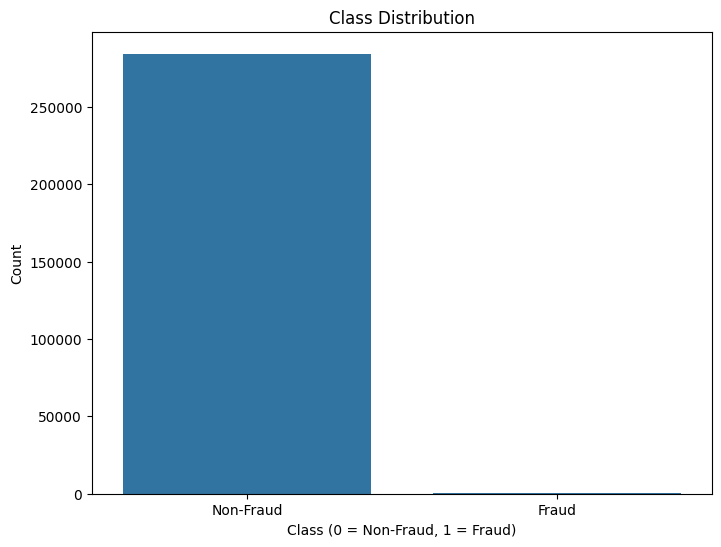

In [79]:
# Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=credit_card_data)
plt.title('Class Distribution')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

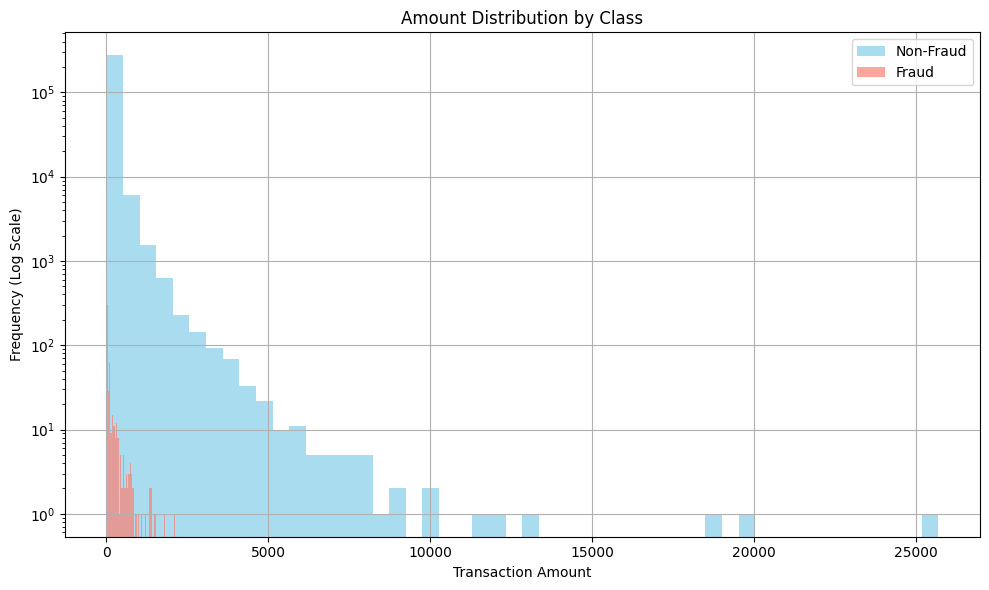

In [80]:
# Amount Distribution
plt.figure(figsize=(10, 6))
plt.hist(credit_card_data[credit_card_data['Class'] == 0]['Amount'],
         bins=50, alpha=0.7, label='Non-Fraud', color='skyblue')
plt.hist(credit_card_data[credit_card_data['Class'] == 1]['Amount'],
         bins=50, alpha=0.7, label='Fraud', color='salmon')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency (Log Scale)')
plt.title('Amount Distribution by Class')
plt.legend()
plt.yscale('log')  # Helps reveal small-frequency fraud transactions
plt.grid(True)
plt.tight_layout()
plt.show()

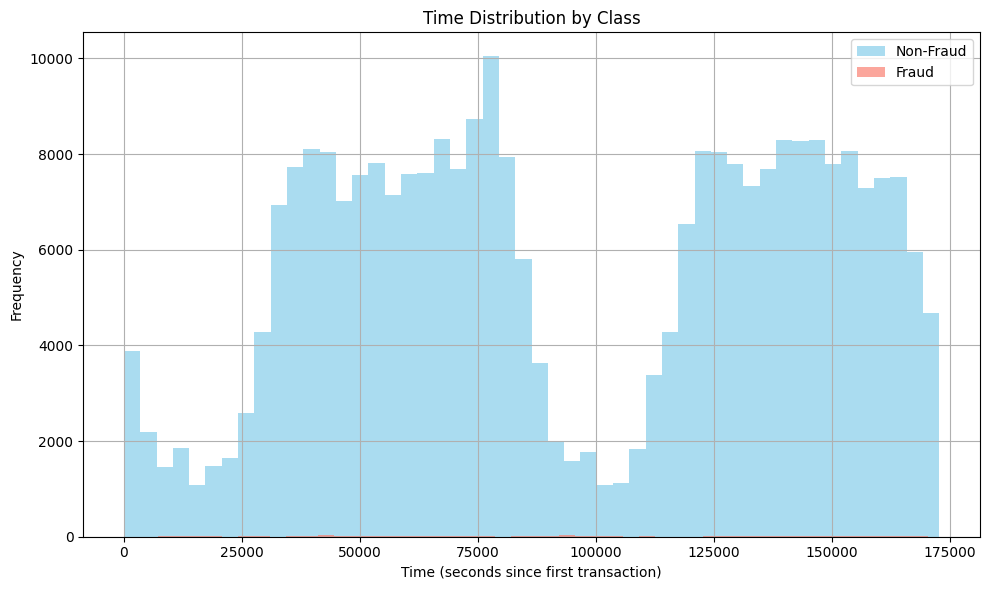

In [81]:
# Time Distribution
plt.figure(figsize=(10, 6))
plt.hist(credit_card_data[credit_card_data['Class'] == 0]['Time'],
         bins=50, alpha=0.7, label='Non-Fraud', color='skyblue')
plt.hist(credit_card_data[credit_card_data['Class'] == 1]['Time'],
         bins=50, alpha=0.7, label='Fraud', color='salmon')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Frequency')
plt.title('Time Distribution by Class')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Insights

1.Fraudsters tend to make low-value transactions, likely to avoid detection.

2.Fraudulent (red) transactions are heavily concentrated at lower amounts, mostly below ₹2,000.

3.This supports using techniques like SMOTE, as fraud patterns are underrepresented and could be drowned out.

4.Fraudulent transactions are barely visible, but they do occur across the entire time window — no clear clustering.

In [82]:
# Data Preprocessing

In [83]:
# Separate features and target
X = credit_card_data.drop('Class', axis=1)
y = credit_card_data['Class']


In [84]:
print(X)


            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [85]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


In [86]:
# Step : Split the data
X = credit_card_data.drop('Class', axis=1)
y = credit_card_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)



In [87]:
# Step : Prepare data for models
# For Logistic Regression (needs scaling)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Scale only 'Amount' and 'Time' columns
X_train_scaled[['Amount', 'Time']] = scaler.fit_transform(X_train[['Amount', 'Time']])
X_test_scaled[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])


In [88]:
 4.#Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)



In [90]:
# Initialize model
model = LogisticRegression(random_state=42)

# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=skf, scoring='roc_auc')
print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean ROC-AUC: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
model.fit(X_train_balanced, y_train_balanced)


Cross-Validation ROC-AUC Scores: [0.99166323 0.99151033 0.99160336 0.99149689 0.9914646 ]
Mean ROC-AUC: 0.9915 (±0.0001)


LogisticRegression(random_state=42)

In [91]:
# Test set evaluation
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("\nTest Set Performance:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Store important metrics
results = {
    'cv_mean_roc_auc': cv_scores.mean(),
    'test_roc_auc': roc_auc_score(y_test, y_prob),
    'precision_1': classification_report(y_test, y_pred, output_dict=True)['1']['precision'],
    'recall_1': classification_report(y_test, y_pred, output_dict=True)['1']['recall'],
    'model': model
}

print("\n=== Final Metrics ===")
print(f"Mean CV ROC-AUC: {results['cv_mean_roc_auc']:.4f}")
print(f"Test ROC-AUC: {results['test_roc_auc']:.4f}")
print(f"Fraud Precision: {results['precision_1']:.4f}")
print(f"Fraud Recall: {results['recall_1']:.4f}")


Test Set Performance:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC-AUC Score: 0.9699
Confusion Matrix:
[[55403  1461]
 [    8    90]]

=== Final Metrics ===
Mean CV ROC-AUC: 0.9915
Test ROC-AUC: 0.9699
Fraud Precision: 0.0580
Fraud Recall: 0.9184
